In [ ]:
import re


In [2]:
def read_file(file_path):
    with open(file_path, 'r') as file:
        transcript = file.read()

    return transcript

transcript = read_file('/Users/sanjayravindran/Documents/dugree/analytics-test/transcript.txt')

Speaker 1 [0.01s - 26.53s]:  You're saying that you think it's the two narratives. Yeah, but we can't hear you very loudly. Maybe it's much better, much better.
Speaker 3 [4.60s - 25.21s]:  Yeah, I was just saying that I think it's pretty obvious why Native Americans would side with Palestinians. I didn't really know that there were Palestinians, that there were Native Americans who were pro-Israel. Sorry, is this better?
Speaker 3 [26.65s - 39.19s]:  Yeah, I was just saying that I'm not surprised that that they're Native Americans who are pro-Palestinian, but I didn't know about pro-Israel.
Speaker 1 [37.82s - 63.28s]:  So are you surprised by that? Because the point is that there are Native Americans that then seem to support Israel because of the claim for indigeneity. They understand what it's like to be a people, sometimes tribes that have the spiritual dimension to these tribes, they're kicked out of their land and now they want to come back to their land. That's also exactly the

In [4]:
import re

def preprocess_transcript(transcript):
    segments = re.findall(r'(Speaker \d+) \[(\d+\.\d+)s - (\d+\.\d+)s\]:\s+(.+?)(?=\nSpeaker \d+ \[|\Z)', transcript, re.DOTALL)
    conversations = [(speaker, float(start), float(end), text.strip()) for speaker, start, end, text in segments]
    return conversations

conversations = preprocess_transcript(transcript)

print(conversations)

[('Speaker 1', 0.01, 26.53, "You're saying that you think it's the two narratives. Yeah, but we can't hear you very loudly. Maybe it's much better, much better."), ('Speaker 3', 4.6, 25.21, "Yeah, I was just saying that I think it's pretty obvious why Native Americans would side with Palestinians. I didn't really know that there were Palestinians, that there were Native Americans who were pro-Israel. Sorry, is this better?"), ('Speaker 3', 26.65, 39.19, "Yeah, I was just saying that I'm not surprised that that they're Native Americans who are pro-Palestinian, but I didn't know about pro-Israel."), ('Speaker 1', 37.82, 63.28, "So are you surprised by that? Because the point is that there are Native Americans that then seem to support Israel because of the claim for indigeneity. They understand what it's like to be a people, sometimes tribes that have the spiritual dimension to these tribes, they're kicked out of their land and now they want to come back to their land. That's also exactl

In [5]:
from collections import defaultdict

def analyze_speaking_time(conversations):
    speaking_time = defaultdict(float)
    for speaker, start, end, _ in conversations:
        speaking_time[speaker] += end - start
    return speaking_time

speaking_time = analyze_speaking_time(conversations)
print(speaking_time)

defaultdict(<class 'float'>, {'Speaker 1': 1966.1800000000003, 'Speaker 3': 1411.3899999999992, 'Speaker 2': 1343.3200000000015})


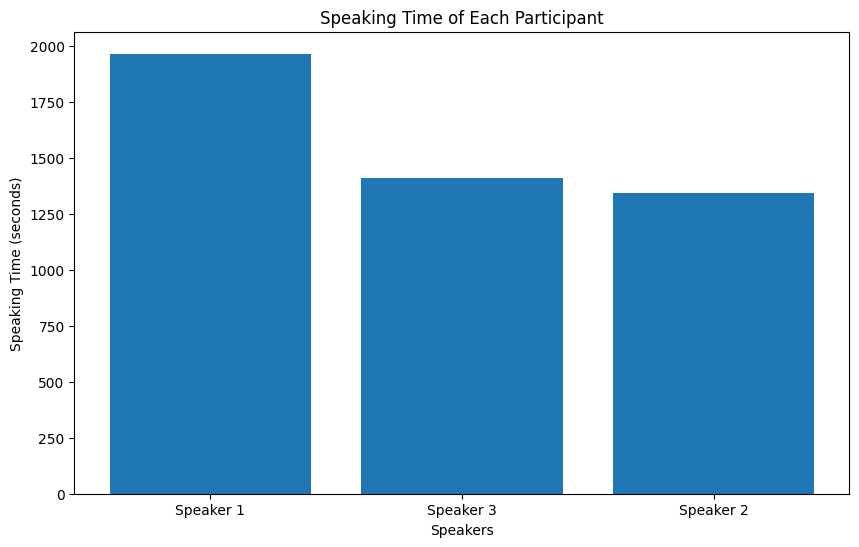

In [9]:
import matplotlib.pyplot as plt


def plot_speaking_time(speaking_time):
    speakers = list(speaking_time.keys())
    times = list(speaking_time.values())
    plt.figure(figsize=(10, 6))
    plt.bar(speakers, times)
    plt.xlabel('Speakers')
    plt.ylabel('Speaking Time (seconds)')
    plt.title('Speaking Time of Each Participant')
    plt.show()
plot_speaking_time(speaking_time)
